In [1]:
#utilizando modelo de regresion logistica
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv("dataset-prueba2.csv",header=None)

In [3]:
X = data.iloc[:,0:32]
y = data.iloc[:,64:65]

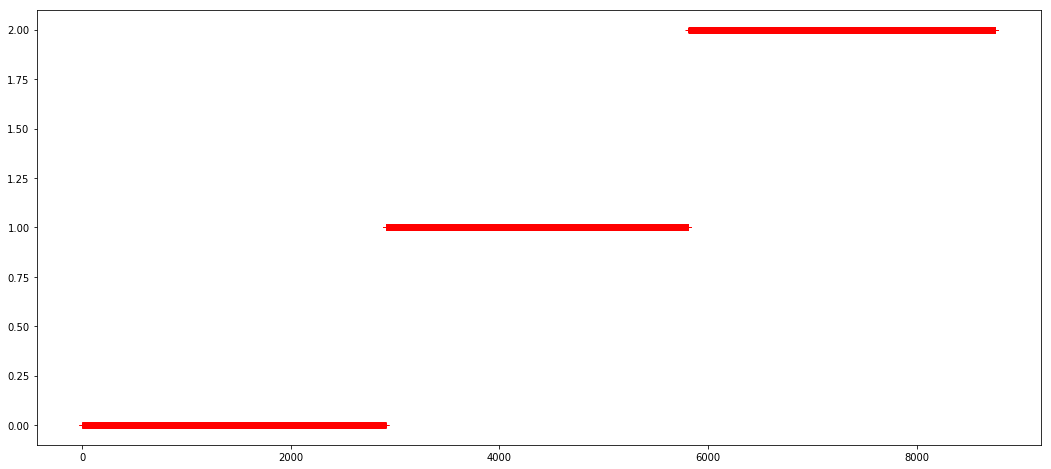

In [4]:
plt.figure(figsize=(18,8))
plt.plot(y,'r+')
plt.show()

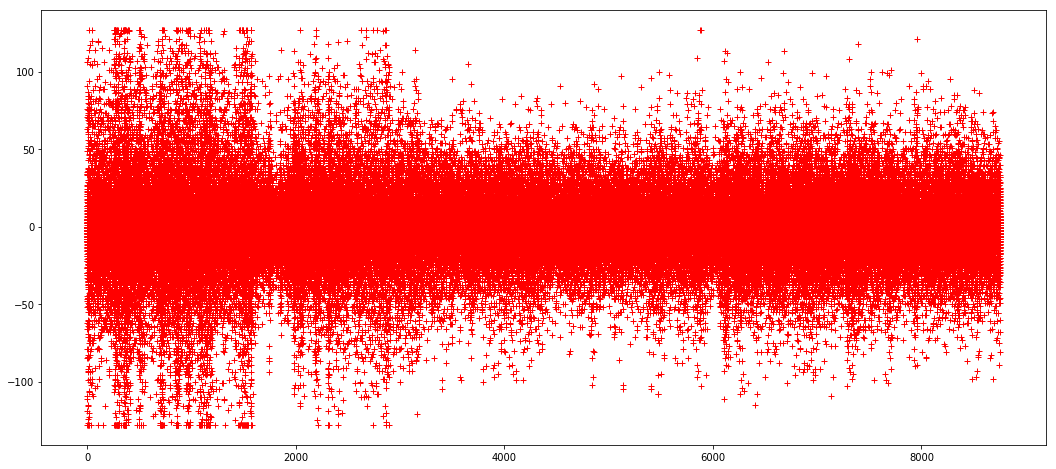

In [5]:
plt.figure(figsize=(18,8))
plt.plot(X,'r+')
plt.show()

In [6]:
#primero debemos imaginar la situacion que se va dar
#el jugador se pondra en posision para jugar y en esos instantes cuando haga sus movimientos para ganar en el juego
#cuando cuenten hasta 3 y lancen sus elementos la maquina entregará al programa la serie de 64 datos 
#que estos deben ser evaluados en la funcion de prediccion adivinando y ganando al contrincante.

#la funcion unique() calcula cuantos valores son unicos. se me ocurre que utilizamos la traspuesta y una columna de observacion
#vemos cuantos valores unicos hay y borrar los datos repetidos.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=30)

In [8]:
#aprendemos del modelo
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
y_pred = LogReg.predict(X_test)

In [13]:
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.44      0.44       723
           1       0.38      0.26      0.31       764
           2       0.31      0.42      0.35       702

   micro avg       0.37      0.37      0.37      2189
   macro avg       0.38      0.37      0.37      2189
weighted avg       0.38      0.37      0.37      2189



In [16]:
lista_separable=[]
X1=[]
X2=[]
X3=[]
y=[]
for i in range(0,data.shape[0]):
    if(data.iloc[i,64]==0):
        for j in range(0,data.shape[1]-1):
            lista_separable.append(data.iloc[i,j])
        y.append(0)
        X1.append(lista_separable)
        lista_separable=[]
    if(data.iloc[i,64]==1):
        for j in range(0,data.shape[1]-1):
            lista_separable.append(data.iloc[i,j])
        X2.append(lista_separable)
        lista_separable=[]
    if(data.iloc[i,64]==2):
        for j in range(0,data.shape[1]-1):
            lista_separable.append(data.iloc[i,j])
        X3.append(lista_separable)
        lista_separable=[]

In [29]:
print("la longitud de x1 : "+repr(len(X1))+" la lonitud de x2 : "+repr(len(X2))+" la lonitud de x2 : "+repr(len(X3)))
#


la longitud de x1 : 2910 la lonitud de x2 : 2903 la lonitud de x2 : 2943


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,21.0,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-128.0,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-54.0,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,60.0,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0


In [70]:
X1= pd.DataFrame(X1)
X2= pd.DataFrame(X2)
X3= pd.DataFrame(X3)
lista_separable=[]
D1=[]
y_variable=[]
for count in range(3):
    for h  in range(int(len(X2)/2)):
        if(count==0):
            y_variable.append(0)
        elif(count==1):
            y_variable.append(1)
        else:
            y_variable.append(2)
            
        for k  in range(64):
            if(count==0):
                lista_separable.append(X1.iloc[h,k])
                if(len(lista_separable)==64):
                    D1.append(lista_separable)
                    lista_separable=[]
                #print(len(lista_separable))
            if(count==1):
                lista_separable.append(X2.iloc[h,k])
                if(len(lista_separable)==64):
                    D1.append(lista_separable)
                    lista_separable=[]
            if(count==2):
                lista_separable.append(X3.iloc[h,k])
                if(len(lista_separable)==64):
                    D1.append(lista_separable)
                    lista_separable=[]

In [73]:
D1 =pd.DataFrame(D1)


In [15]:
presicion=confusion_matrix[0][0]/(confusion_matrix[0][1]+confusion_matrix[0][2]+confusion_matrix[0][0])
print(presicion)

0.43983402489626555
